C:\Users\Aamit\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Aamit\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\Aamit\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Aamit\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

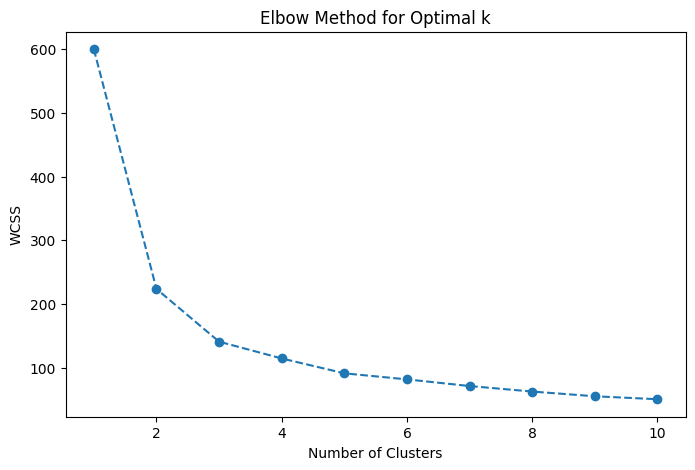

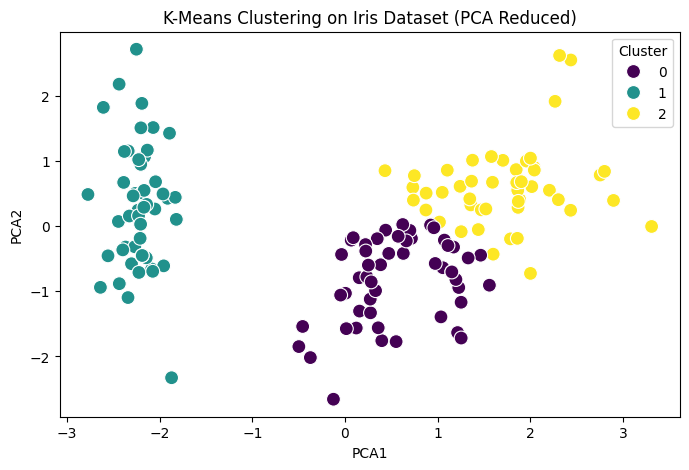

   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
0            5.1           3.5            1.4           0.2  Iris-setosa   
1            4.9           3.0            1.4           0.2  Iris-setosa   
2            4.7           3.2            1.3           0.2  Iris-setosa   
3            4.6           3.1            1.5           0.2  Iris-setosa   
4            5.0           3.6            1.4           0.2  Iris-setosa   

   Cluster      PCA1      PCA2  
0        1 -2.264542  0.505704  
1        1 -2.086426 -0.655405  
2        1 -2.367950 -0.318477  
3        1 -2.304197 -0.575368  
4        1 -2.388777  0.674767  

Cluster Counts:
Cluster
0    53
1    50
2    47
Name: count, dtype: int64


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import os

# Step 1: Load the Dataset
file_path = "Iris.csv"  # Assuming the file is in the same directory as the script

# Ensure the file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found. Please check the file location.")
    exit()

df = pd.read_csv(file_path)

# Drop the 'Id' column as it is not needed
df.drop(columns=['Id'], inplace=True)

# Extract features for clustering
X = df.iloc[:, :-1]  # Excluding the target column 'Species'

# Step 2: Standardizing the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Determine the optimal number of clusters using Elbow Method
wcss = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Step 4: Apply K-Means Clustering with optimal k (Assuming 3 for Iris dataset)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Step 5: Visualize Clusters using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

plt.figure(figsize=(8, 5))
sns.scatterplot(x='PCA1', y='PCA2', hue=df['Cluster'], palette='viridis', data=df, s=100)
plt.title('K-Means Clustering on Iris Dataset (PCA Reduced)')
plt.show()

# Display Clustered Data
print(df.head())
print("\nCluster Counts:")
print(df['Cluster'].value_counts())
